In [1]:
import os 
import skimage
import matplotlib.pyplot as plt
import numpy as np

import SimpleITK as sitk
import nibabel as nib

import cv2
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
main_path = r'/media/suetin/1C28579D2857752C/Data'
print(os.listdir(path=main_path))

['database_nifti', 'Ekb', 'Jpeg', 'sequences', 'testing', 'training']


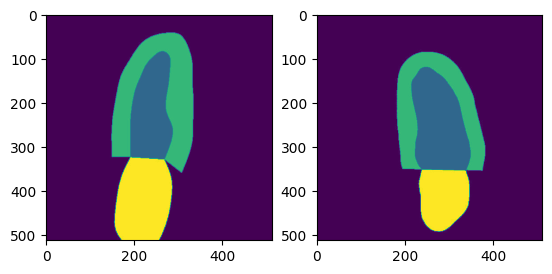

In [3]:
first_jpeg_path = r'/media/suetin/1C28579D2857752C/Data/Jpeg/train/images/images0001.jpeg'
last_jpeg_path =  r'/media/suetin/1C28579D2857752C/Data/Jpeg/train/images/images/1999.jpeg'
first_jpeg_path = r'/media/suetin/1C28579D2857752C/Data/Jpeg/train/masks/masks/0001.jpeg'
last_jpeg_path =  r'/media/suetin/1C28579D2857752C/Data/Jpeg/train/masks/masks/1999.jpeg'

first_jpeg = skimage.io.imread(first_jpeg_path, as_gray=True)
last_jpeg  = skimage.io.imread(last_jpeg_path, as_gray=True)

plt.subplot(121)
plt.imshow(first_jpeg)

plt.subplot(122)
plt.imshow(last_jpeg)

In [4]:
len(np.unique(first_jpeg)), np.unique(first_jpeg)

(254,
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 17

In [5]:
np.unique(last_jpeg)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  29,  30,  31,  32,  33,  35,  40,  41,  46,  54,  56,
        57,  58,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 113, 114, 115, 116, 120, 125, 133, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 198, 199, 200, 201, 203, 207, 210, 222, 225,
       228, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 24

In [6]:
def get_image_filepaths(main_path, img_format, as_mask=False):
    
    # Сюда всё запишем
    filepaths = []
    # Итерируемся по всем пациентам
    for address, dirs, files in os.walk(main_path):
        # Все названия внутри каждого пациента
        for name in files:
            # Выбираем нужный формат
            if img_format in name:
                # Добавляем путь до изображения или маски
                if as_mask:
                    if 'gt' in name and 'sequence' not in name:
                        filepaths.append(os.path.join(address, name))
                else:
                    if 'gt' not in name and 'sequence' not in name:
                        filepaths.append(os.path.join(address, name))
                
    return sorted(filepaths, reverse=False)

In [110]:
def read_mhd(path):
    # Open mhd
    image = skimage.io.imread(path, plugin='simpleitk')
    image = image.reshape((image.shape[1], image.shape[2]))

    return image

def read_nifti(path):
    #
    nii_img = nib.load(path)
    nii_data = nii_img.get_fdata()
    # Rotate image
    nii_data = cv2.rotate(nii_data, cv2.ROTATE_90_CLOCKWISE)

    return np.expand_dims(nii_data, axis=-1).astype('uint8')

(549, 389)


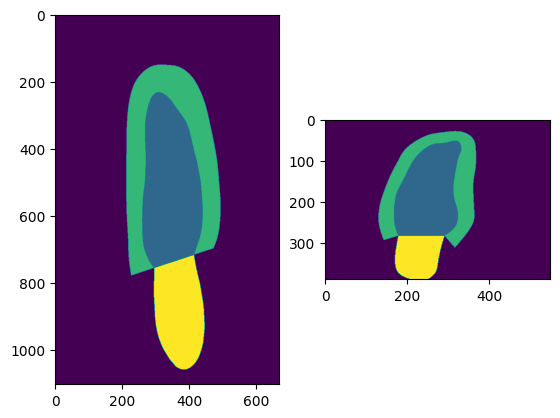

In [8]:
# mhd_path_mask = r'/home/suetin/Projects/VSCode/ComputerVision/HeartSegmentation/TensorFlow/dev/Z/patient0001_2CH_ED_gt.mhd'
mhd_path_mask = r'/media/suetin/1C28579D2857752C/Data/testing/patient0001/patient0001_2CH_ED_gt.mhd'
nii_path_mask = r'/media/suetin/1C28579D2857752C/Data/database_nifti/patient0001/patient0001_2CH_ED_gt.nii.gz'

mhd_mask = read_mhd(mhd_path_mask)
nii_mask = read_nifti(nii_path_mask)

plt.subplot(121)
plt.imshow(mhd_mask)

plt.subplot(122)
plt.imshow(nii_mask);

In [9]:
np.unique(mhd_mask), np.unique(nii_mask)

(array([0, 1, 2, 3], dtype=uint8), array([0, 1, 2, 3], dtype=uint8))

In [10]:
mhd_mask.shape

(1102, 669)

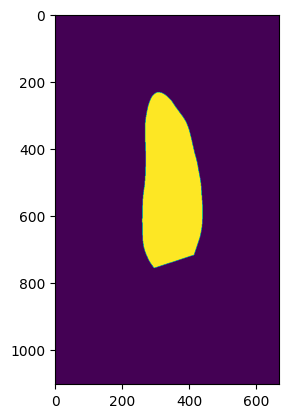

In [11]:
plt.imshow(np.where(mhd_mask == 1, 1, 0));

In [12]:
skimage.io.imsave('test.png', mhd_mask)

In [13]:
img = skimage.io.imread('test.png', as_gray=True)
np.unique(img)

array([0, 1, 2, 3], dtype=uint8)

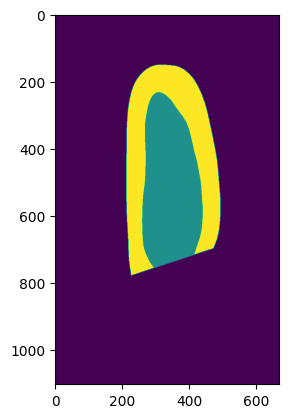

In [14]:
# Drop last class
plt.imshow(np.where(np.isin(img, (0, 1, 2)), img, 0));

In [15]:
mhd_paths_train = os.path.join(main_path, 'training')
mhd_paths_test = os.path.join(main_path, 'testing')
nii_paths = os.path.join(main_path, 'database_nifti')


In [18]:
# IMAGES
mhd_images_paths_train = get_image_filepaths(
    main_path=mhd_paths_train, 
    img_format='mhd',
    as_mask=False,
)
mhd_images_paths_test = get_image_filepaths(
    main_path=mhd_paths_test, 
    img_format='mhd',
    as_mask=False,
)
nii_images_paths = get_image_filepaths(
    main_path=nii_paths, 
    img_format='nii',
    as_mask=False,
)

# MASKS
mhd_masks_paths_train = get_image_filepaths(
    main_path=mhd_paths_train, 
    img_format='mhd',
    as_mask=True,
)
mhd_masks_paths_test = get_image_filepaths(
    main_path=mhd_paths_test, 
    img_format='mhd',
    as_mask=True,
)
nii_masks_paths = get_image_filepaths(
    main_path=nii_paths, 
    img_format='nii',
    as_mask=True,
)

nii_masks_paths

['/media/suetin/1C28579D2857752C/Data/database_nifti/patient0001/patient0001_2CH_ED_gt.nii.gz',
 '/media/suetin/1C28579D2857752C/Data/database_nifti/patient0001/patient0001_2CH_ES_gt.nii.gz',
 '/media/suetin/1C28579D2857752C/Data/database_nifti/patient0001/patient0001_4CH_ED_gt.nii.gz',
 '/media/suetin/1C28579D2857752C/Data/database_nifti/patient0001/patient0001_4CH_ES_gt.nii.gz',
 '/media/suetin/1C28579D2857752C/Data/database_nifti/patient0002/patient0002_2CH_ED_gt.nii.gz',
 '/media/suetin/1C28579D2857752C/Data/database_nifti/patient0002/patient0002_2CH_ES_gt.nii.gz',
 '/media/suetin/1C28579D2857752C/Data/database_nifti/patient0002/patient0002_4CH_ED_gt.nii.gz',
 '/media/suetin/1C28579D2857752C/Data/database_nifti/patient0002/patient0002_4CH_ES_gt.nii.gz',
 '/media/suetin/1C28579D2857752C/Data/database_nifti/patient0003/patient0003_2CH_ED_gt.nii.gz',
 '/media/suetin/1C28579D2857752C/Data/database_nifti/patient0003/patient0003_2CH_ES_gt.nii.gz',
 '/media/suetin/1C28579D2857752C/Data/da

In [19]:
# Train
out_path_image_train = r'/home/suetin/Projects/VSCode/ComputerVision/HeartSegmentation/train/images'
out_path_mask_train = r'/home/suetin/Projects/VSCode/ComputerVision/HeartSegmentation/train/masks'
# Validation
# out_path_image_valid = r'/home/suetin/Projects/VSCode/ComputerVision/HeartSegmentation/valid/images'
# out_path_mask_valid = r'/home/suetin/Projects/VSCode/ComputerVision/HeartSegmentation/valid/masks'
# Test
out_path_image_test = r'/home/suetin/Projects/VSCode/ComputerVision/HeartSegmentation/test/images'
out_path_mask_test = r'/home/suetin/Projects/VSCode/ComputerVision/HeartSegmentation/test/masks'

In [20]:
# We have 4000 images for 500 patients
# Train will have 3200 photo, test 300, and validation 300
# Train
img_path_train = mhd_images_paths_train[:-100] + nii_images_paths[:1700]
msk_path_train = mhd_masks_paths_train[:-100] + nii_masks_paths[:1700]
# # Validation
# img_path_valid = 
# msk_path_valid = 
# Test
img_path_test = mhd_images_paths_train[-100:] + mhd_images_paths_test + nii_images_paths[1700:]
msk_path_test = mhd_masks_paths_train[-100:] + mhd_masks_paths_test + nii_masks_paths[1700:]


len(img_path_test), img_path_test[:10], img_path_test[-10:]

(600,
 ['/media/suetin/1C28579D2857752C/Data/training/patient0426/patient0426_2CH_ED.mhd',
  '/media/suetin/1C28579D2857752C/Data/training/patient0426/patient0426_2CH_ES.mhd',
  '/media/suetin/1C28579D2857752C/Data/training/patient0426/patient0426_4CH_ED.mhd',
  '/media/suetin/1C28579D2857752C/Data/training/patient0426/patient0426_4CH_ES.mhd',
  '/media/suetin/1C28579D2857752C/Data/training/patient0427/patient0427_2CH_ED.mhd',
  '/media/suetin/1C28579D2857752C/Data/training/patient0427/patient0427_2CH_ES.mhd',
  '/media/suetin/1C28579D2857752C/Data/training/patient0427/patient0427_4CH_ED.mhd',
  '/media/suetin/1C28579D2857752C/Data/training/patient0427/patient0427_4CH_ES.mhd',
  '/media/suetin/1C28579D2857752C/Data/training/patient0428/patient0428_2CH_ED.mhd',
  '/media/suetin/1C28579D2857752C/Data/training/patient0428/patient0428_2CH_ES.mhd'],
 ['/media/suetin/1C28579D2857752C/Data/database_nifti/patient0498/patient0498_4CH_ED.nii.gz',
  '/media/suetin/1C28579D2857752C/Data/database_n

# Train

In [116]:
def resize_mask(mask, out_shape):
    """ Because resize returned a lot of unique values. 
    For every class we resize separately.
    """
    new_msk = np.zeros(out_shape)
    targets = np.unique(mask)[1:]  # Because first class is 0 (ФОН)

    for target in targets:
        msk = np.where(mask == target, 255, 0)
        msk = skimage.transform.resize(msk, out_shape) * 255  # Что за говно она возвращает
        new_msk += np.where(msk > np.mean(msk), target, 0)

    return np.where(new_msk == 3, 2, new_msk) # There's a crosses of classes

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

array([0, 1, 2], dtype=uint8)

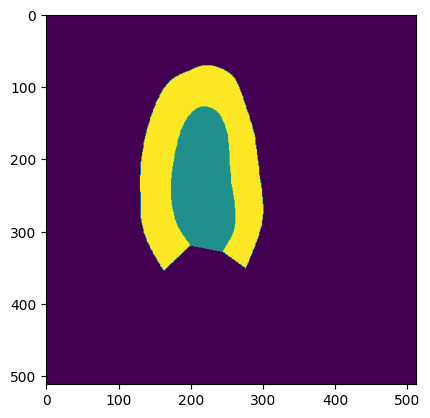

In [117]:
classes = (0, 1, 2)  # Without 3
output_shape = (512, 512)
i = 0

for img_path, msk_path in zip(img_path_train, msk_path_train):

    try:
        folder, img_format = img_path.split('.')
    except:
        folder, img_format, _ = img_path.split('.')
    # 
    if img_format == "nii":
        img = read_nifti(img_path)[:, :, 0]
        msk = read_nifti(msk_path)[:, :, 0]
        msk = np.where(np.isin(msk, classes), msk, 0)
    elif img_format == "mhd":
        img = read_mhd(img_path)
        msk = read_mhd(msk_path)
        msk = np.where(np.isin(msk, classes), msk, 0)
        
    # Obtain needed image shape
    img = skimage.transform.resize(img, output_shape=output_shape) * 255
    msk = resize_mask(msk, output_shape)
    # Change type to int after resize
    img = img.astype('uint8')
    msk = msk.astype('uint8')
    # Get name and Save image
    img_name = os.path.join(out_path_image_train, f"{str(i+1).zfill(4)}.png")
    msk_name = os.path.join(out_path_mask_train, f"{str(i+1).zfill(4)}.png")   # Because jpeg broke all categories

    skimage.io.imsave(img_name, img)
    skimage.io.imsave(msk_name, (msk / 2 * 255).astype('uint8'))

    i += 1

plt.imshow(msk);
np.unique(msk) 

array([  0, 127, 255], dtype=uint8)

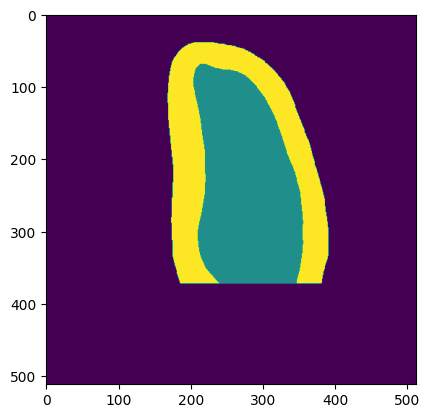

In [118]:
im = skimage.io.imread(r'/home/suetin/Projects/VSCode/ComputerVision/HeartSegmentation/train/masks/0001.png')

plt.imshow(im)
np.unique(im)


# Test

array([0, 1, 2], dtype=uint8)

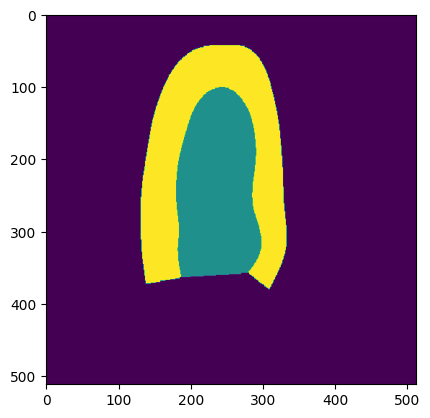

In [119]:
classes = (0, 1, 2)  # Without 3
output_shape = (512, 512)
i = 0

for img_path, msk_path in zip(img_path_test, msk_path_test):

    try:
        folder, img_format = img_path.split('.')
    except:
        folder, img_format, _ = img_path.split('.')
    # 
    if img_format == "nii":
        img = read_nifti(img_path)[:, :, 0]
        msk = read_nifti(msk_path)[:, :, 0]
        msk = np.where(np.isin(msk, classes), msk, 0)
    elif img_format == "mhd":
        img = read_mhd(img_path)
        msk = read_mhd(msk_path)
        msk = np.where(np.isin(msk, classes), msk, 0)
        
    # Obtain needed image shape
    img = skimage.transform.resize(img, output_shape=output_shape) * 255
    msk = resize_mask(msk, output_shape)
    # Change type to int after resize
    img = img.astype('uint8')
    msk = msk.astype('uint8')
    # Get name and Save image
    img_name = os.path.join(out_path_image_test, f"{str(i+1).zfill(4)}.png")
    msk_name = os.path.join(out_path_mask_test, f"{str(i+1).zfill(4)}.png")   # Because jpeg broke all categories

    skimage.io.imsave(img_name, img)
    skimage.io.imsave(msk_name, (msk / 2 * 255).astype('uint8'))

    i += 1

plt.imshow(msk);
np.unique(msk) 